<a href="https://colab.research.google.com/github/mpatel5/FoundationsOfDataScience/blob/main/PythonProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving NYPD_Arrest_Data__Year_to_Date__20250401.csv to NYPD_Arrest_Data__Year_to_Date__20250401.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset (file should be in the same directory or specify full path)
df = pd.read_csv("NYPD_Arrest_Data__Year_to_Date__20250401.csv")

In [17]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281369711,01/30/2024,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,25,0,25-44,M,BLACK,1000558,231080,40.800930,-73.941098,POINT (-73.9410982410066 40.8009303727402)
1,284561406,03/30/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,44,0,25-44,M,BLACK,1004297,242846,40.833209,-73.927554,POINT (-73.927554 40.833209)
2,284896016,04/06/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,19,0,25-44,M,BLACK,997304,222853,40.778348,-73.952863,POINT (-73.952863 40.778348)
3,285569016,04/18/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,69,0,25-44,M,BLACK,1010576,175628,40.648698,-73.905128,POINT (-73.905128 40.648698)
4,287308954,05/22/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,18,0,18-24,M,WHITE,991530,217373,40.763313,-73.973717,POINT (-73.973717 40.763313)


In [6]:
# Filter data for Manhattan (M) and Brooklyn (K)
df_filtered = df[df["ARREST_BORO"].isin(["M", "K"])]

In [7]:
# Clean data - remove missing or empty offense descriptions
df_filtered_clean = df_filtered[df_filtered["OFNS_DESC"].notna() & (df_filtered["OFNS_DESC"] != "")]

In [8]:
# Count offenses by borough and offense type
offense_counts = df_filtered_clean.groupby(["ARREST_BORO", "OFNS_DESC"]).size().reset_index(name="Count")

In [9]:
# Pivot for side-by-side comparison
offense_pivot = offense_counts.pivot(index="OFNS_DESC", columns="ARREST_BORO", values="Count").fillna(0)

In [10]:
# Add total and sort by overall frequency
offense_pivot["Total"] = offense_pivot.sum(axis=1)
offense_pivot_sorted = offense_pivot.sort_values(by="Total", ascending=False)

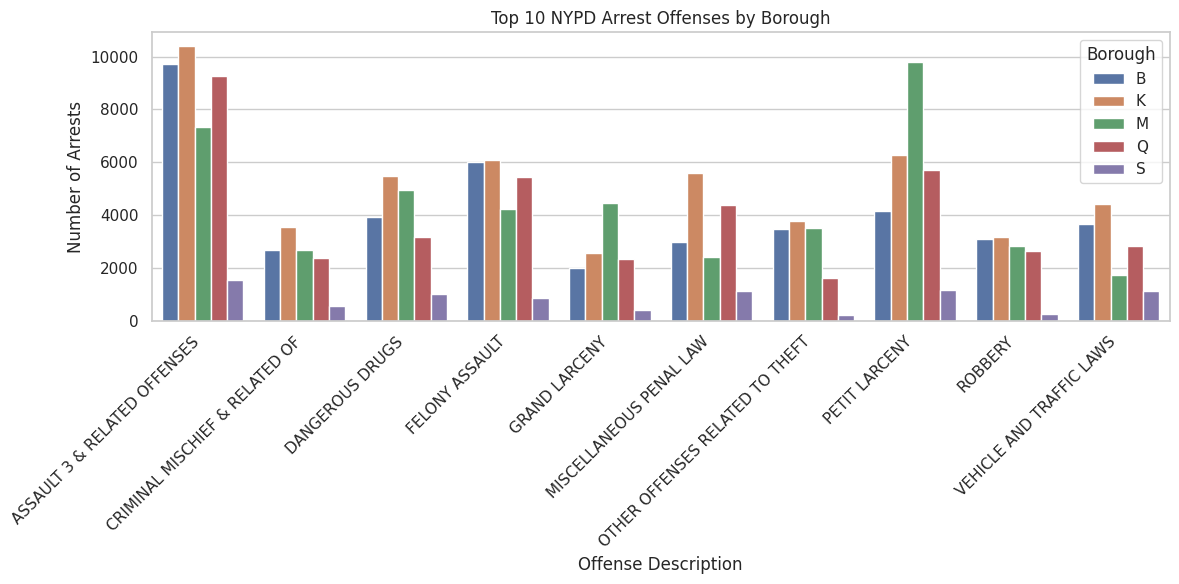

In [18]:
# Visualization - Top 10 offenses across all boroughs
df_all_clean = df[df["OFNS_DESC"].notna() & (df["OFNS_DESC"] != "")]
top_10_all = df_all_clean['OFNS_DESC'].value_counts().head(10).index.tolist()
df_top_10_all = df_all_clean[df_all_clean['OFNS_DESC'].isin(top_10_all)]
top_10_borough_counts = df_top_10_all.groupby(['OFNS_DESC', 'ARREST_BORO']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_borough_counts, x='OFNS_DESC', y='Count', hue='ARREST_BORO')
plt.title("Top 10 NYPD Arrest Offenses by Borough")
plt.xlabel("Offense Description")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.tight_layout()
plt.show()

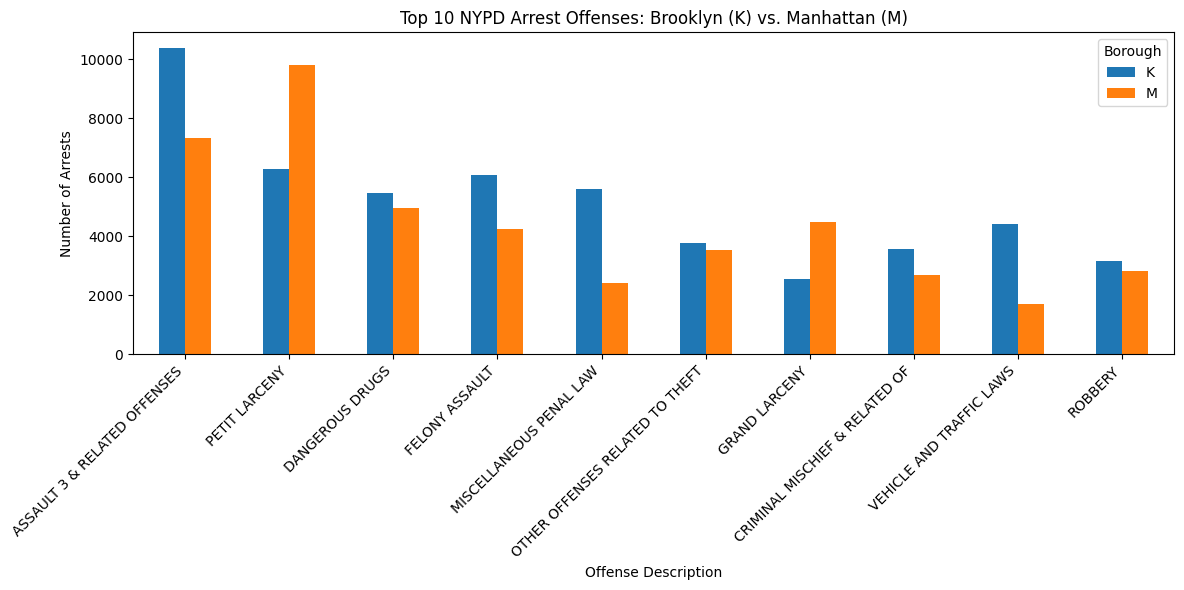

In [11]:
# Visualization - Top 10 offenses
top_10 = offense_pivot_sorted.head(10)[["K", "M"]]  # K = Brooklyn, M = Manhattan
top_10.plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 NYPD Arrest Offenses: Brooklyn (K) vs. Manhattan (M)")
plt.xlabel("Offense Description")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.tight_layout()
plt.show()


In [12]:
# Visualization - Offense Category Proportions by Borough
offense_totals = df_filtered_clean.groupby(["ARREST_BORO"])['OFNS_DESC'].value_counts(normalize=True).rename("Proportion").reset_index()


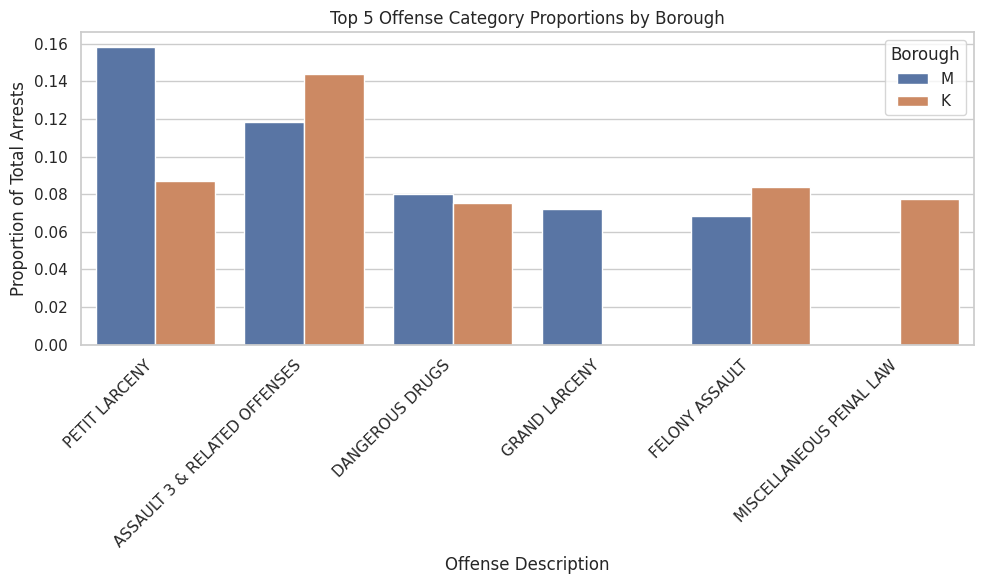

In [13]:
# Filter to top 5 offenses in each borough for visibility
top_offenses_m = offense_totals[offense_totals["ARREST_BORO"] == "M"].nlargest(5, "Proportion")
top_offenses_k = offense_totals[offense_totals["ARREST_BORO"] == "K"].nlargest(5, "Proportion")

top_combined = pd.concat([top_offenses_m, top_offenses_k])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_combined, x="OFNS_DESC", y="Proportion", hue="ARREST_BORO")
plt.title("Top 5 Offense Category Proportions by Borough")
plt.xlabel("Offense Description")
plt.ylabel("Proportion of Total Arrests")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.tight_layout()
plt.show()

In [14]:
# Visualization - Offense Category Proportions by Borough
offense_totals = df_filtered_clean.groupby(["ARREST_BORO"])['OFNS_DESC'].value_counts(normalize=True).rename("Proportion").reset_index()

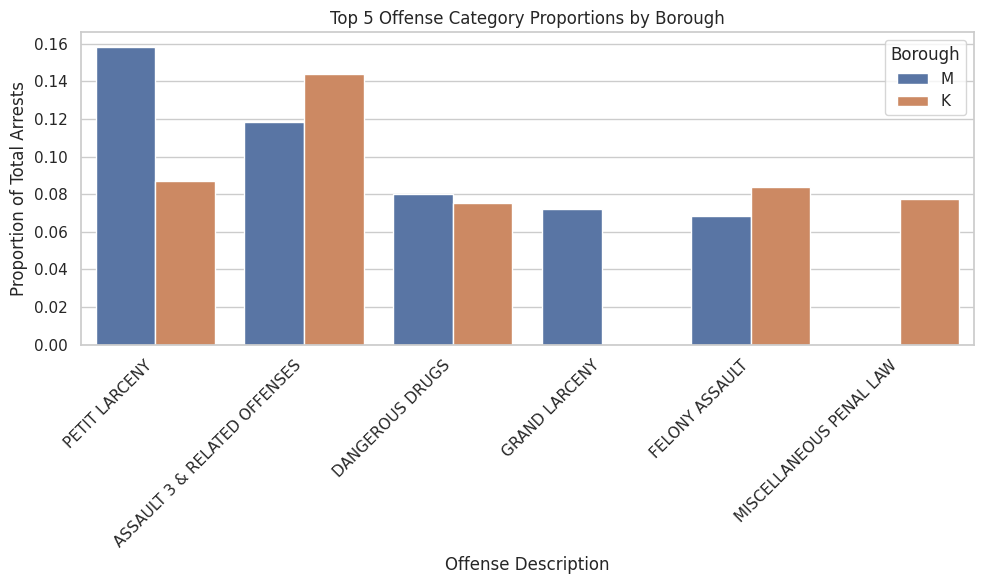

In [15]:
# Filter to top 5 offenses in each borough for visibility
top_offenses_m = offense_totals[offense_totals["ARREST_BORO"] == "M"].nlargest(5, "Proportion")
top_offenses_k = offense_totals[offense_totals["ARREST_BORO"] == "K"].nlargest(5, "Proportion")

top_combined = pd.concat([top_offenses_m, top_offenses_k])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_combined, x="OFNS_DESC", y="Proportion", hue="ARREST_BORO")
plt.title("Top 5 Offense Category Proportions by Borough")
plt.xlabel("Offense Description")
plt.ylabel("Proportion of Total Arrests")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.tight_layout()
plt.show()

In [16]:
# Conclusion (printed for reporting purposes)
print("""
Conclusion:
The arrest data shows that certain offenses are more common in Manhattan, such as petit larceny,
while Brooklyn sees higher numbers for assault-related charges. These differences may reflect
variations in policing focus, neighborhood demographics, or types of economic activity in each borough.
However, it is important to recognize that arrest data does not necessarily reflect actual crime rates,
but rather the patterns of law enforcement activity. Potential bias may arise from over-policing in
certain communities or underreporting in others, which can skew the apparent distribution of offenses.
""")


Conclusion:
The arrest data shows that certain offenses are more common in Manhattan, such as petit larceny,
while Brooklyn sees higher numbers for assault-related charges. These differences may reflect
variations in policing focus, neighborhood demographics, or types of economic activity in each borough.
However, it is important to recognize that arrest data does not necessarily reflect actual crime rates,
but rather the patterns of law enforcement activity. Potential bias may arise from over-policing in
certain communities or underreporting in others, which can skew the apparent distribution of offenses.

